In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np

# Define the path to the root folder containing your data
data_root = '/content/drive/MyDrive/NITRKL Bangla/NITRKL Bangla'

# Define image dimensions
image_width = 40
image_height = 40

# Initialize empty lists for storing images and labels
images = []
labels = []

# Loop through the subfolders (0 to 9) in the root folder
for label in range(10):
    folder_path = os.path.join(data_root, str(label))

    # Loop through image files in the current subfolder
    for filename in os.listdir(folder_path):
        if True:
            # Load the image
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
            image = cv2.resize(image, (image_width, image_height))  # Resize the image

            # Normalize the image (if needed)
            # image = (image - np.mean(image)) / np.std(image)
            print(f"Label: {label}, Image Shape: {image.shape}")
            # Append the image and label to the lists
            images.append(image)
            labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Adjust the test_size and random_state as needed
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# You can now use X_train, X_test, y_train, and y_test for training and testing your model.
# Perform any further preprocessing or model-specific data organization if needed.


Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0, Image Shape: (40, 40)
Label: 0

In [3]:
import numpy as np
import pandas as pd

# Assuming you have X_train, X_test, y_train, and y_test defined.

# Training data
unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
class_count_train = pd.DataFrame({'Class': unique_classes_train, 'Count': counts_train})
print("Training Data:")
print(class_count_train)

# Testing data
unique_classes_test, counts_test = np.unique(y_test, return_counts=True)
class_count_test = pd.DataFrame({'Class': unique_classes_test, 'Count': counts_test})
print("\nTesting Data:")
print(class_count_test)


Training Data:
   Class  Count
0      0    355
1      1    365
2      2    375
3      3    359
4      4    385
5      5    392
6      6    395
7      7    304
8      8    283
9      9    279

Testing Data:
   Class  Count
0      0    105
1      1    102
2      2    101
3      3    104
4      4     95
5      5     95
6      6     79
7      7     57
8      8     65
9      9     70


In [4]:
!pip install sklearn_extensions

import scipy.io as io
from keras.models import Sequential
from keras.layers import Lambda, Conv2D, Flatten, Layer, Activation, MaxPool2D
import tensorflow as tf
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import os
from mlxtend.data import loadlocal_mnist
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as MLP
import warnings
warnings.filterwarnings("ignore")
import cv2
from keras.optimizers import SGD
from keras import models

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn_extensions: filename=sklearn_extensions-0.0.2-py2.py3-none-any.whl size=24561 sha256=4e1ec40d5ded46ac02f2d7b9e9193f26f2304875a78f9074a49bb59d691cc680
  Stored in directory: /root/.cache/pip/wheels/ce/1c/74/03c0ce66c802eea0d2bd6aaa354ff27ea9a0b6aeed096ef0ac
Successfully built sklearn_extensions


In [5]:
X_train.shape

(3492, 40, 40)

In [6]:
X_train = X_train.reshape(-1, 40, 40, 1)

In [7]:
X_train.shape

(3492, 40, 40, 1)

In [8]:
X_test = X_test.reshape(-1, 40, 40, 1)

In [9]:
X_test.shape

(873, 40, 40, 1)

In [18]:
# Normalize pixel values to the range [0, 1]
X_train = tf.cast(X_train, dtype=tf.float32) / 255.0
X_test = tf.cast(X_test, dtype=tf.float32) / 255.0

In [10]:
y_train.shape

(3492,)

In [11]:
y_true=tf.keras.utils.to_categorical(y_train, num_classes=10)

In [12]:
y_true.shape

(3492, 10)

In [83]:
from tensorflow.keras.layers import Conv2D, Activation, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

class MultiplicationLayer(Layer):
    def __init__(self, L1, L2, **kwargs):
        super(MultiplicationLayer, self).__init__(**kwargs)
        self.L1 = L1
        self.L2 = L2

    def build(self, input_shape):
        self.n = input_shape[2]  # Get the 'n' dimension from the input shape
        self.v = self.add_weight(name='v',
                                 shape=(self.n, 5,self.L1 * self.L2),  # Update the shape to (n, 2, L2)
                                 initializer='random_normal',
                                 trainable=True)
        super(MultiplicationLayer, self).build(input_shape)

    def call(self, inputs):
        # Initialize an empty list to store results for each filter
        results = []

        # Reshape v to match the desired shape
        v_reshaped = tf.reshape(self.v, (self.n, 5, self.L1 * self.L2))

        # Iterate over the multiplication filters (L2)
        for i in range(self.L2):
            # Iterate over the input channels (L1)
            for j in range(self.L1):
                # Perform matrix multiplication between input and v
                channel_result = tf.matmul(inputs[:, :, :, j], v_reshaped[:, :, i * self.L1 + j])

                # Append the channel result to the results list
                results.append(channel_result)

        # Stack the results to form the final result tensor of size [m x 2 x( L1 x L2)]
        result = tf.stack(results, axis=-1)
        #The responses of this layer are then added to obtain a single feature matrix of size m x 2;.
        # Sum the responses along the last axis to obtain a single feature matrix of size m x 2
        result = tf.reduce_sum(result, axis=-1)


        return result
def new_model(m, n, p):
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(5, 5), input_shape=(m,n,p), padding='same'))
    model.add(Activation('sigmoid'))
    model.add(MultiplicationLayer(8,8))
    model.add(Activation('sigmoid'))
    model.add(Flatten())
    return model
def obj_eval_old(data, model):
    m = []
    v = []
    # Predict on all data samples at once
    model_outputs = model.predict(data)

    # Calculate mean and variance using NumPy
    m = np.mean(model_outputs, axis=0)
    v = np.var(model_outputs, axis=0)
    mt = np.mean(m, axis=0)
    mt=np.mean(np.array(m),axis=0)
    # Calculate m_obj using NumPy
    m_diff = m - m
    m_diff_sum = np.sqrt(np.sum(np.square(m_diff)))

    m_obj = np.sum(m_diff_sum) + np.sum(np.sqrt(np.sum(np.square(mt - m))))

    # Calculate v_obj using NumPy
    v_obj = np.sum(v)

    return m_obj, v_obj


def calculate_inter_class_distance(y_true, class_predictions):
    num_classes = 10
    num_features = class_predictions.shape[1]
    inter_class_distance = 0.0

    for i in range(num_classes):
        for j in range(i + 1, num_classes):
                class_i_indices = np.where(y_true[:, i] == 1)[0]
                class_j_indices = np.where(y_true[:, j] == 1)[0]

                if len(class_i_indices) > 0 and len(class_j_indices) > 0:
                    mean_i = np.mean(class_predictions[class_i_indices])
                    mean_j = np.mean(class_predictions[class_j_indices])
                    inter_class_distance += np.abs(mean_i - mean_j)

    return inter_class_distance

def calculate_intra_class_variance(y_true, class_predictions):
    num_classes = 10
    num_features = class_predictions.shape[1]
    intra_class_variance = 0.0

    for i in range(num_classes):
            class_i_indices = np.where(y_true[i] == 1)[0]
            if len(class_i_indices) > 0:
                mean_i = np.mean(class_predictions[class_i_indices])
                variance_i = np.var(class_predictions[class_i_indices])
                intra_class_variance += variance_i

    return intra_class_variance


def obj_eval(data, model):
  # Predict on all data samples at once
    model_outputs = model.predict(data)
    m_obj = calculate_inter_class_distance(y_true, model_outputs)
    v_obj = calculate_intra_class_variance(y_true, model_outputs)
    return m_obj, v_obj







def initialize_pop(w):
    pop=[]
    for i in range(len(w)):
        pop.append((-1+np.random.random(w[i].shape)*2)*0.1)
    return pop
def initialize_vel(w):
    vel=[]
    for i in range(len(w)):
        vel.append(np.random.random(w[i].shape))
    return vel



def get_feature(data,model):
    for i in range(len(data)):
        out = model.predict(data[i], steps=1)
        if i==0:
            feature = np.array(out)
            label = np.ones((out.shape[0],1))*i
        else:
            feature = np.append(feature,out,axis=0)
            label = np.append(label, np.ones((out.shape[0],1))*i,axis=0)
    return feature, label



def precision(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return (tp)/(tp+fp)

def recall(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return (tp)/(tp+fn)

def accuracy_f(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return (tp+tn)/(tp+tn+fp+fn)
def tp_f(label, confusion_matrix):
    tp = confusion_matrix[label, label];
    fn = np.sum(confusion_matrix[label, :]) - tp;
    fp = np.sum(confusion_matrix[:, label]) - tp;
    tn = np.sum(confusion_matrix) - (tp+fp+fn)
    return tp,fn,fp,tn
def report(y_test_categorical, y_pred_categorical):
    # Compute classification metrics
    print(classification_report(y_test_categorical, y_pred_categorical))

    # Create a confusion matrix



def k_nn(train_feature,train_label,test_feature,test_label):
    cls=knn(n_neighbors=1)
    cls.fit(train_feature, train_label)
    p = cls.predict(test_feature)
    acc = accuracy_score(test_label, p)
    report(test_label, p)
    return(acc)

def svc_new(train_feature,train_label,test_feature,test_label):
    cls=SVC(C=10000,gamma=10,kernel='rbf',random_state=None,tol=0.000001,coef0=0,degree=2,decision_function_shape='ovr')
    cls.fit(train_feature, train_label)
    p = cls.predict(test_feature)
    acc = accuracy_score(test_label, p)
    report(test_label, p)
    return(acc)
def mlp_new(train_feature,train_label,test_feature,test_label):
    cls=MLP(solver='adam', alpha=0.00003, hidden_layer_sizes=(100,20), tol=0.00001, activation='identity', max_iter=5000)
    cls.fit(train_feature, train_label)
    p = cls.predict(test_feature)
    acc = accuracy_score(test_label, p)
    report(test_label, p)
    return(acc)

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def analyze_model_errors(y_true, y_pred):
    # Generate confusion matrix
    conf_mat = confusion_matrix(y_true, y_pred)
    print("confution matrix",conf_mat)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Print a classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

# Example usage:
# analyze_model_errors(true_labels, predicted_labels)


def report(y_test_categorical, y_pred_categorical):
    # Compute classification metrics
    print(classification_report(y_test_categorical, y_pred_categorical))
    analyze_model_errors(y_test_categorical, y_pred_categorical)


    # Create a confusion matrix



def k_nn(train_feature,train_label,test_feature,test_label):
    cls=knn(n_neighbors=1)
    cls.fit(train_feature, train_label)
    p = cls.predict(test_feature)
    acc = accuracy_score(test_label, p)
    print("knn")
    report(test_label, p)
    return(acc)

def svc_new(train_feature,train_label,test_feature,test_label):
    cls=SVC(C=10000,gamma=10,kernel='rbf',random_state=None,tol=0.000001,coef0=0,degree=2,decision_function_shape='ovr')
    cls.fit(train_feature, train_label)
    p = cls.predict(test_feature)
    acc = accuracy_score(test_label, p)
    print("svm")
    report(test_label, p)
    return(acc)
def mlp_new(train_feature,train_label,test_feature,test_label):
    cls=MLP(solver='adam', alpha=0.00003, hidden_layer_sizes=(100,20), tol=0.00001, activation='identity', max_iter=5000)
    cls.fit(train_feature, train_label)
    p = cls.predict(test_feature)
    acc = accuracy_score(test_label, p)
    print("bpnn")
    report(test_label, p)
    return(acc)

In [85]:
model = new_model(40,40,1)
print(model.summary())

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 40, 40, 8)         208       
                                                                 
 activation_68 (Activation)  (None, 40, 40, 8)         0         
                                                                 
 multiplication_layer_10 (M  (None, 40, 5)             12800     
 ultiplicationLayer)                                             
                                                                 
 activation_69 (Activation)  (None, 40, 5)             0         
                                                                 
 flatten_8 (Flatten)         (None, 200)               0         
                                                                 
Total params: 13008 (50.81 KB)
Trainable params: 13008 (50.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [86]:



pop_sz = 20
MaxIter = 50

w = model.get_weights()
pop = []
vel = []
for i in range(pop_sz):
    pop.append(initialize_pop(w))
pop = np.array(pop)
for i in range(pop_sz):
    vel.append(initialize_vel(w))

m_obj = []
v_obj = []
for i in range(pop_sz):
    model.set_weights(pop[i])
    m, v = obj_eval(X_train, model)
    m_obj.append(m)
    v_obj.append(v)
m_obj = np.array(m_obj)
v_obj = np.array(v_obj)

110/110 [==============================] - 0s 4ms/step


In [ ]:
m_obj

array([0.51034856, 0.13336629, 0.58317006, 0.29854178, 0.16263917,
       0.30242845, 0.32768342, 0.25392923, 0.21254367, 0.39612871,
       0.12285733, 0.30575556, 0.322492  , 0.31352413, 0.17662668,
       0.28517467, 0.30282515, 0.27339524, 0.16909665, 0.2056303 ])

In [ ]:
v_obj

array([0.98429598, 1.14574096, 0.43100527, 0.66978305, 1.03073744,
       0.75170685, 0.77658237, 0.73193287, 1.06580076, 0.74356277,
       0.65177817, 0.32459995, 0.20407251, 1.00061548, 0.99223147,
       1.28541636, 0.57216498, 0.54864598, 0.749355  , 0.66015366])

In [87]:
it = 1
plot_g_m = []
plot_g_v = []
while it <= MaxIter:
        obj = 0.2 * (m_obj / np.sum(m_obj)) - 0.8 * (v_obj / np.sum(v_obj))
        g_best = np.argmax(obj)
        global_best = np.copy(pop[g_best])
        global_best_m_obj = np.copy(m_obj[g_best])
        global_best_v_obj = np.copy(v_obj[g_best])
        g_worst = np.argmin(obj)
        global_worst = np.copy(pop[g_worst])
        global_worst_m_obj = np.copy(m_obj[g_worst])
        global_worst_v_obj = np.copy(v_obj[g_worst])
        print("iteration:{}\t global m:{}\t global v:{}\t mean_m:{}\t mean_v:{}".format(it, global_best_m_obj, global_best_v_obj, np.mean(m_obj), np.mean(v_obj)))

        for i in range(pop_sz):
            npop = pop[i] + np.multiply(np.random.random(pop[i].shape), global_best - np.abs(pop[i])) - np.multiply(np.random.random(pop[i].shape), global_worst - np.abs(pop[i]))
            model.set_weights(npop)
            [m, v] = obj_eval(X_train, model)

            if (m > m_obj[i] and v < v_obj[i]) or (m > m_obj[i] and v == v_obj[i]) or (m == m_obj[i] and v < v_obj[i]):
                pop[i] = np.copy(npop)
                m_obj[i] = np.copy(m)
                v_obj[i] = np.copy(v)
            else:
                npop = pop[i] + (np.multiply(np.random.random(pop[i].shape), global_best) - np.multiply(np.random.random(pop[i].shape), global_worst)) / 2
                model.set_weights(npop)
                [m, v] = obj_eval(X_train, model)

                if (m > m_obj[i] and v < v_obj[i]) or (m > m_obj[i] and v == v_obj[i]) or (m == m_obj[i] and v < v_obj[i]):
                    pop[i] = np.copy(npop)
                    m_obj[i] = np.copy(m)
                    v_obj[i] = np.copy(v)

        plot_g_m.append(global_best_m_obj)
        plot_g_v.append(global_best_v_obj)
        it = it + 1

iteration:1	 global m:0.030078351497650146	 global v:0.08429284207522869	 mean_m:0.03006725162267685	 mean_v:0.6276353605091571
110/110 [==============================] - 0s 4ms/step
iteration:2	 global m:0.11017578840255737	 global v:0.13242210540920496	 mean_m:0.04303878396749496	 mean_v:0.4523330510593951
110/110 [==============================] - 0s 3ms/step
iteration:3	 global m:0.21976721286773682	 global v:0.10166667215526104	 mean_m:0.06801136434078217	 mean_v:0.28977722200070277
110/110 [==============================] - 0s 3ms/step
iteration:4	 global m:0.07993179559707642	 global v:0.003071755258133635	 mean_m:0.09714160561561584	 mean_v:0.24083779387146934
110/110 [==============================] - 0s 3ms/step
iteration:5	 global m:0.17389631271362305	 global v:0.028128994395956397	 mean_m:0.12140567898750305	 mean_v:0.15518148226401535
110/110 [==============================] - 0s 3ms/step
iteration:6	 global m:0.17389631271362305	 global v:0.028128994395956397	 mean_m:0.1

28/28 [==============================] - 0s 4ms/step
knn
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.74      0.75      0.75       102
           2       0.88      0.86      0.87       101
           3       0.65      0.63      0.64       104
           4       0.76      0.73      0.74        95
           5       0.59      0.65      0.62        95
           6       0.54      0.54      0.54        79
           7       0.73      0.81      0.77        57
           8       0.55      0.52      0.54        65
           9       0.75      0.66      0.70        70

    accuracy                           0.71       873
   macro avg       0.70      0.70      0.70       873
weighted avg       0.71      0.71      0.71       873

confution matrix [[88  4  0  0  1  5  3  4  0  0]
 [ 1 77  3  2  7  6  0  1  3  2]
 [ 1  5 87  1  1  1  1  1  0  3]
 [ 2  4  0 66  1  3 11  6 10  1]
 [ 3  4  0  5 69  6  3  1  3  1]
 [

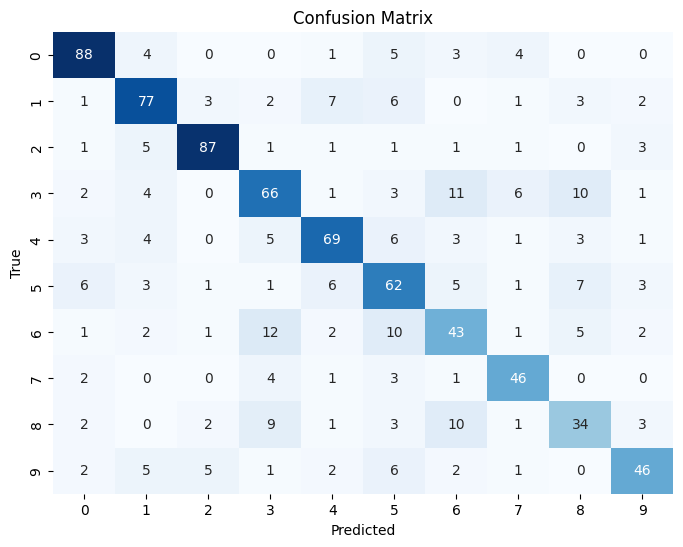

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.74      0.75      0.75       102
           2       0.88      0.86      0.87       101
           3       0.65      0.63      0.64       104
           4       0.76      0.73      0.74        95
           5       0.59      0.65      0.62        95
           6       0.54      0.54      0.54        79
           7       0.73      0.81      0.77        57
           8       0.55      0.52      0.54        65
           9       0.75      0.66      0.70        70

    accuracy                           0.71       873
   macro avg       0.70      0.70      0.70       873
weighted avg       0.71      0.71      0.71       873

svm
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       105
           1       0.77      0.69      0.73       102
           2       0.68      0.94      0.79       1

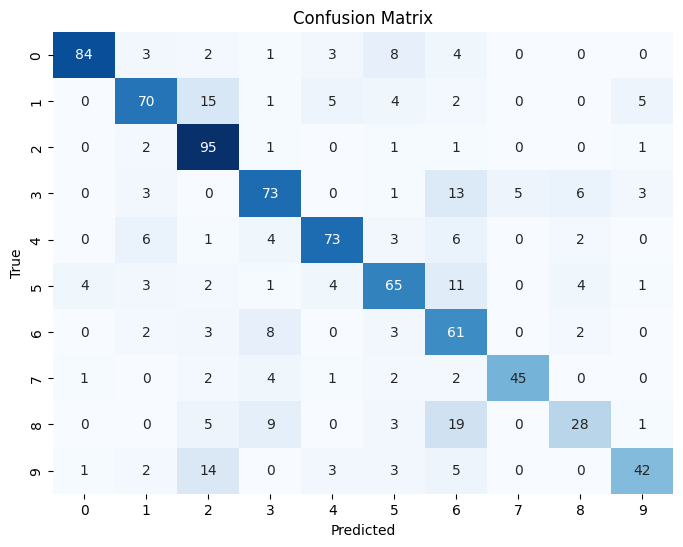

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       105
           1       0.77      0.69      0.73       102
           2       0.68      0.94      0.79       101
           3       0.72      0.70      0.71       104
           4       0.82      0.77      0.79        95
           5       0.70      0.68      0.69        95
           6       0.49      0.77      0.60        79
           7       0.90      0.79      0.84        57
           8       0.67      0.43      0.52        65
           9       0.79      0.60      0.68        70

    accuracy                           0.73       873
   macro avg       0.75      0.72      0.72       873
weighted avg       0.75      0.73      0.73       873

bpnn
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.64      0.88      0.74       102
           2       0.91      0.80      0.85       

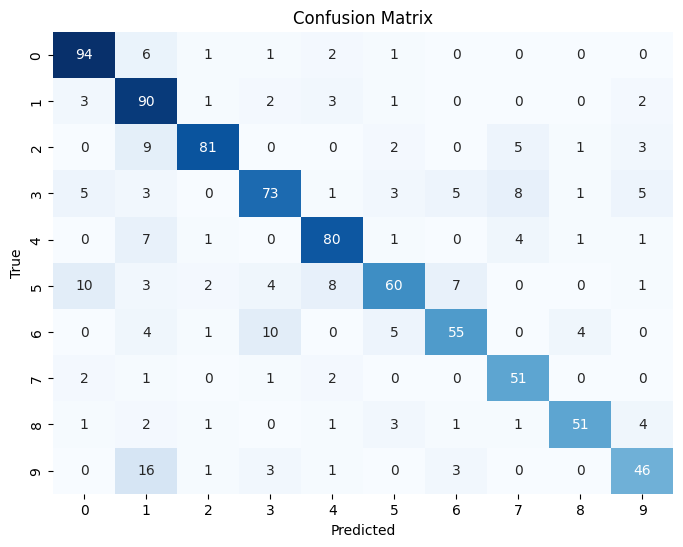

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.64      0.88      0.74       102
           2       0.91      0.80      0.85       101
           3       0.78      0.70      0.74       104
           4       0.82      0.84      0.83        95
           5       0.79      0.63      0.70        95
           6       0.77      0.70      0.73        79
           7       0.74      0.89      0.81        57
           8       0.88      0.78      0.83        65
           9       0.74      0.66      0.70        70

    accuracy                           0.78       873
   macro avg       0.79      0.78      0.78       873
weighted avg       0.79      0.78      0.78       873

|knn 0.7079037800687286	|svm 0.7285223367697594	|bpnn 0.7800687285223368	|


In [88]:
obj = m_obj - v_obj
g_best = np.argmax(obj)
global_best = np.copy(pop[g_best])
model.set_weights(global_best)
[m, v] = obj_eval(X_train, model)
train_feature = model.predict(X_train)
test_feature = model.predict(X_test)
acc1 = k_nn(train_feature, y_train, test_feature, y_test)
acc3 = svc_new(train_feature, y_train, test_feature, y_test)
acc4 = mlp_new(train_feature, y_train, test_feature, y_test)
print('|knn {}\t|svm {}\t|bpnn {}\t|'.format(acc1, acc3, acc4))

28/28 [==============================] - 0s 1ms/step


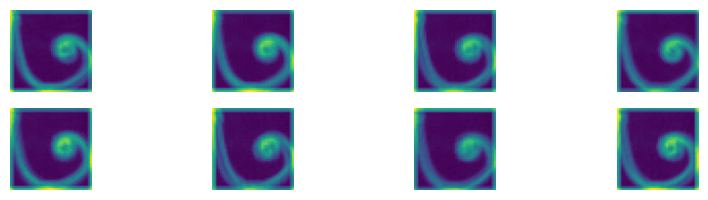

In [22]:
from tensorflow.keras.models import Sequential, Model
conv_layer = Model(inputs=model.input, outputs=model.layers[0].output)
feature_maps = conv_layer.predict(X_test)
plt.figure(figsize=(10, 10))
for i in range(8):
    plt.subplot(8, 4, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

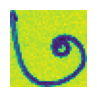

In [23]:
# Plot the image
# Define the desired figure size (e.g., 5x5)
figure_size = (1, 1)

# Plot the image with the specified figure size
plt.figure(figsize=figure_size)
plt.imshow(X_test[0], cmap='viridis')
plt.axis('off')
plt.show()

** attention**

In [79]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Self-Attention Layer
class SelfAttention(layers.Layer):
    def __init__(self, d_model):
        super(SelfAttention, self).__init__()
        self.wq = layers.Dense(d_model)
        self.wk = layers.Dense(d_model)
        self.wv = layers.Dense(d_model)

    def call(self, x):
        q = self.wq(x)
        k = self.wk(x)
        v = self.wv(x)

        attention_weights = tf.nn.softmax(tf.matmul(q, k, transpose_b=True) / tf.math.sqrt(tf.cast(tf.shape(k)[-1], tf.float32)))
        output = tf.matmul(attention_weights, v)

        return output




from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Input
import tensorflow as tf

def new_model_attention(m, n, p, d_model):
    model = Sequential()
    model.add(Conv2D(8, kernel_size=(5, 5), input_shape=(m, n, p), padding='same'))
    model.add(Activation('sigmoid'))

    # Add the SelfAttention Layer
    model.add(SelfAttention(d_model))

    model.add(Activation('sigmoid'))
    model.add(MultiplicationLayer(8,8))
    model.add(Activation('sigmoid'))
    model.add(Flatten())

    return model
# Example usage
at_model = new_model_attention(40,40,1, d_model=8)
print(at_model.summary())

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 40, 40, 8)         208       
                                                                 
 activation_59 (Activation)  (None, 40, 40, 8)         0         
                                                                 
 self_attention_28 (SelfAtt  (None, 40, 40, 8)         216       
 ention)                                                         
                                                                 
 activation_60 (Activation)  (None, 40, 40, 8)         0         
                                                                 
 multiplication_layer_9 (Mu  (None, 40, 5)             12800     
 ltiplicationLayer)                                              
                                                                 
 activation_61 (Activation)  (None, 40, 5)           

In [25]:



pop_sz = 20
MaxIter = 50

w = at_model.get_weights()
pop = []
vel = []
for i in range(pop_sz):
    pop.append(initialize_pop(w))
pop = np.array(pop)
for i in range(pop_sz):
    vel.append(initialize_vel(w))

m_obj = []
v_obj = []
for i in range(pop_sz):
    at_model.set_weights(pop[i])
    m, v = obj_eval(X_train, at_model)
    m_obj.append(m)
    v_obj.append(v)
m_obj = np.array(m_obj)
v_obj = np.array(v_obj)

110/110 [==============================] - 0s 4ms/step


In [26]:
it = 1
plot_g_m = []
plot_g_v = []
while it <= MaxIter:
        obj = 0.2 * (m_obj / np.sum(m_obj)) - 0.8 * (v_obj / np.sum(v_obj))
        g_best = np.argmax(obj)
        global_best = np.copy(pop[g_best])
        global_best_m_obj = np.copy(m_obj[g_best])
        global_best_v_obj = np.copy(v_obj[g_best])
        g_worst = np.argmin(obj)
        global_worst = np.copy(pop[g_worst])
        global_worst_m_obj = np.copy(m_obj[g_worst])
        global_worst_v_obj = np.copy(v_obj[g_worst])
        print("iteration:{}\t global m:{}\t global v:{}\t mean_m:{}\t mean_v:{}".format(it, global_best_m_obj, global_best_v_obj, np.mean(m_obj), np.mean(v_obj)))

        for i in range(pop_sz):
            npop = pop[i] + np.multiply(np.random.random(pop[i].shape), global_best - np.abs(pop[i])) - np.multiply(np.random.random(pop[i].shape), global_worst - np.abs(pop[i]))
            at_model.set_weights(npop)
            [m, v] = obj_eval(X_train, at_model)

            if (m > m_obj[i] and v < v_obj[i]) or (m > m_obj[i] and v == v_obj[i]) or (m == m_obj[i] and v < v_obj[i]):
                pop[i] = np.copy(npop)
                m_obj[i] = np.copy(m)
                v_obj[i] = np.copy(v)
            else:
                npop = pop[i] + (np.multiply(np.random.random(pop[i].shape), global_best) - np.multiply(np.random.random(pop[i].shape), global_worst)) / 2
                at_model.set_weights(npop)
                [m, v] = obj_eval(X_train, at_model)

                if (m > m_obj[i] and v < v_obj[i]) or (m > m_obj[i] and v == v_obj[i]) or (m == m_obj[i] and v < v_obj[i]):
                    pop[i] = np.copy(npop)
                    m_obj[i] = np.copy(m)
                    v_obj[i] = np.copy(v)

        plot_g_m.append(global_best_m_obj)
        plot_g_v.append(global_best_v_obj)
        it = it + 1

iteration:1	 global m:0.0024550259113311768	 global v:0.15948532335460186	 mean_m:0.0004966393113136292	 mean_v:0.5685989513993264
110/110 [==============================] - 0s 4ms/step
iteration:2	 global m:0.0037971138954162598	 global v:0.22572186402976513	 mean_m:0.0008338138461112977	 mean_v:0.408664935384877
110/110 [==============================] - 0s 4ms/step
iteration:3	 global m:0.0048642754554748535	 global v:0.16781355440616608	 mean_m:0.0011255919933319091	 mean_v:0.33623237221036106
110/110 [==============================] - 1s 7ms/step
iteration:4	 global m:0.009805083274841309	 global v:0.14341228734701872	 mean_m:0.0016078665852546693	 mean_v:0.2989330697135301
110/110 [==============================] - 0s 4ms/step
iteration:5	 global m:0.009805083274841309	 global v:0.14341228734701872	 mean_m:0.001665516197681427	 mean_v:0.2819704650202766
110/110 [==============================] - 1s 5ms/step
iteration:6	 global m:0.008359372615814209	 global v:0.06685861758887768	

28/28 [==============================] - 0s 7ms/step
knn
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       105
           1       0.70      0.75      0.73       102
           2       0.82      0.79      0.81       101
           3       0.77      0.72      0.74       104
           4       0.73      0.80      0.76        95
           5       0.64      0.63      0.63        95
           6       0.64      0.73      0.69        79
           7       0.95      0.96      0.96        57
           8       0.89      0.83      0.86        65
           9       0.79      0.69      0.73        70

    accuracy                           0.77       873
   macro avg       0.78      0.78      0.78       873
weighted avg       0.77      0.77      0.77       873

confution matrix [[88  2  0  5  8  2  0  0  0  0]
 [ 0 77  5  0  2  8  6  0  1  3]
 [ 1  5 80  0  0  8  0  0  1  6]
 [ 4  5  1 75  0  3 13  1  1  1]
 [ 7  4  0  1 76  3  2  1  0  1]
 [

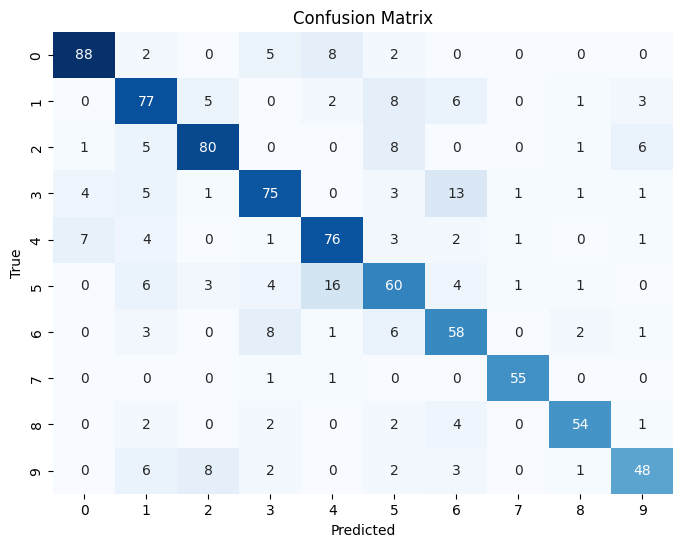

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       105
           1       0.70      0.75      0.73       102
           2       0.82      0.79      0.81       101
           3       0.77      0.72      0.74       104
           4       0.73      0.80      0.76        95
           5       0.64      0.63      0.63        95
           6       0.64      0.73      0.69        79
           7       0.95      0.96      0.96        57
           8       0.89      0.83      0.86        65
           9       0.79      0.69      0.73        70

    accuracy                           0.77       873
   macro avg       0.78      0.78      0.78       873
weighted avg       0.77      0.77      0.77       873

svm
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.72      0.79      0.75       102
           2       0.80      0.77      0.79       1

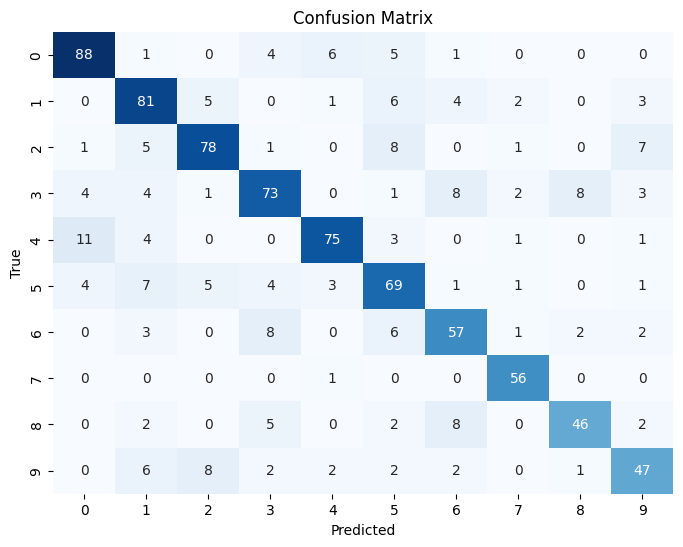

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.72      0.79      0.75       102
           2       0.80      0.77      0.79       101
           3       0.75      0.70      0.73       104
           4       0.85      0.79      0.82        95
           5       0.68      0.73      0.70        95
           6       0.70      0.72      0.71        79
           7       0.88      0.98      0.93        57
           8       0.81      0.71      0.75        65
           9       0.71      0.67      0.69        70

    accuracy                           0.77       873
   macro avg       0.77      0.77      0.77       873
weighted avg       0.77      0.77      0.77       873

bpnn
              precision    recall  f1-score   support

           0       0.59      0.67      0.62       105
           1       0.37      0.61      0.46       102
           2       0.54      0.47      0.50       

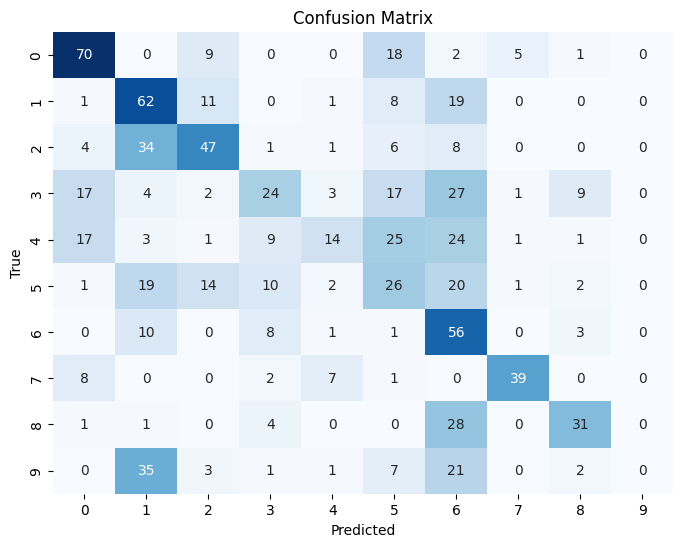

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.67      0.62       105
           1       0.37      0.61      0.46       102
           2       0.54      0.47      0.50       101
           3       0.41      0.23      0.29       104
           4       0.47      0.15      0.22        95
           5       0.24      0.27      0.25        95
           6       0.27      0.71      0.39        79
           7       0.83      0.68      0.75        57
           8       0.63      0.48      0.54        65
           9       0.00      0.00      0.00        70

    accuracy                           0.42       873
   macro avg       0.43      0.43      0.40       873
weighted avg       0.43      0.42      0.40       873

|knn 0.7686139747995419	|svm 0.7674684994272624	|bpnn 0.422680412371134	|


In [27]:
obj = m_obj - v_obj
g_best = np.argmax(obj)
global_best = np.copy(pop[g_best])
at_model.set_weights(global_best)
[m, v] = obj_eval(X_train, at_model)
train_feature = at_model.predict(X_train)
test_feature = at_model.predict(X_test)
acc1 = k_nn(train_feature, y_train, test_feature, y_test)
acc3 = svc_new(train_feature, y_train, test_feature, y_test)
acc4 = mlp_new(train_feature, y_train, test_feature, y_test)
print('|knn {}\t|svm {}\t|bpnn {}\t|'.format(acc1, acc3, acc4))

28/28 [==============================] - 0s 2ms/step


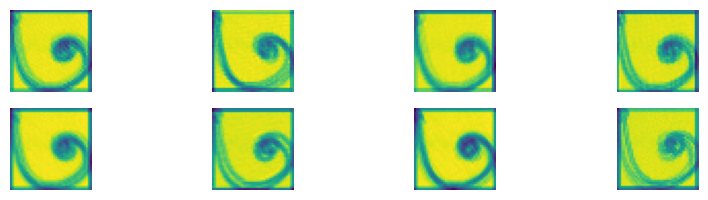

In [28]:
from tensorflow.keras.models import Sequential, Model
conv_layer = Model(inputs=at_model.input, outputs=at_model.layers[0].output)
feature_maps = conv_layer.predict(X_test)
plt.figure(figsize=(10, 10))
for i in range(8):
    plt.subplot(8, 4, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()

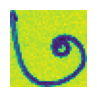

In [29]:
# Plot the image
# Define the desired figure size (e.g., 5x5)
figure_size = (1, 1)

# Plot the image with the specified figure size
plt.figure(figsize=figure_size)
plt.imshow(X_test[0], cmap='viridis')
plt.axis('off')
plt.show()

In [30]:
y_test[0]

3

**spacial reduction**

In [ ]:
pip install pydot graphviz

In [ ]:
from tensorflow.keras.utils import plot_model

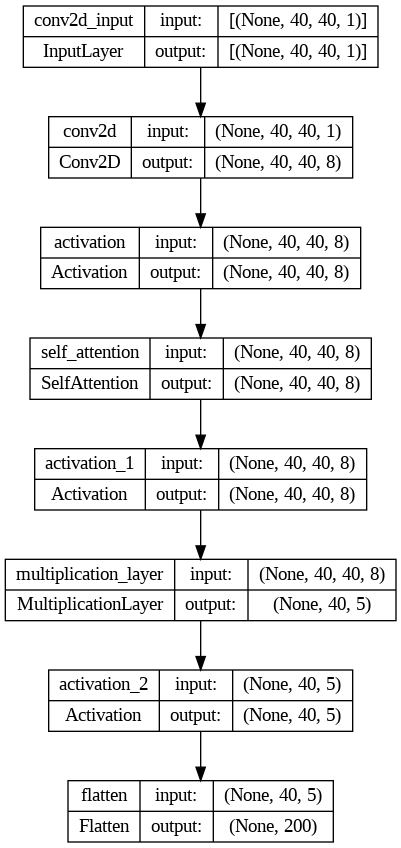

In [ ]:
plot_model(at_model, show_shapes=True, to_file='at_model.png')